In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Primeras filas
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# FILTRAR filas (filter en R)
# Ejemplo: solo pasajeros de primera clase
primera_clase = titanic[titanic['Pclass'] == 1]

In [3]:
# También pueden usar query() para expresiones complejas
mayores_30 = titanic.query('Age > 30')

In [4]:
# SELECCIONAR columnas (select en R)
subset = titanic[['Name', 'Age', 'Survived']]



In [5]:
# ORDENAR (arrange en R)
por_edad = titanic.sort_values('Age', ascending=True)

In [6]:
# CREAR nuevas columnas (mutate en R)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [7]:
# AGRUPAR y RESUMIR (group_by + summarize en R)
por_clase = titanic.groupby('Pclass').agg({
    'Survived': 'mean',
    'Age': 'median',
    'Fare': ['mean', 'std']
})

In [8]:
# Contar frecuencias (count en R)
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
# Resumen estadístico básico
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [12]:
# Valores faltantes
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

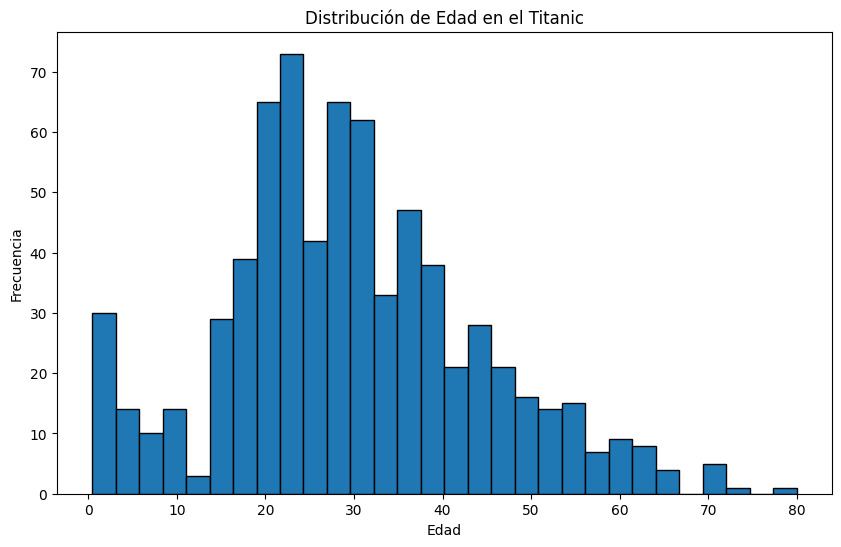

In [13]:
# Distribución de una variable continua
plt.figure(figsize=(10, 6))
plt.hist(titanic['Age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad en el Titanic')
plt.show()

<Axes: ylabel='Fare'>

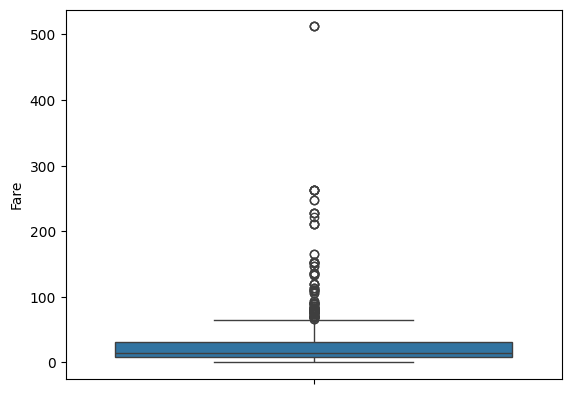

In [14]:
# Boxplot para detectar outliers
sns.boxplot(data=titanic, y='Fare')

In [15]:
# Relación entre dos variables categóricas
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


<Axes: xlabel='Age', ylabel='Fare'>

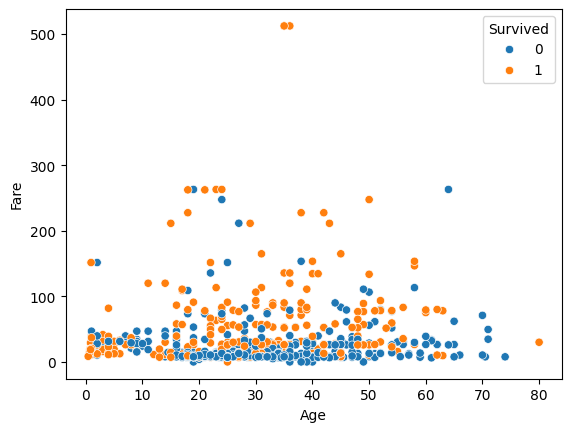

In [16]:
# Visualización de dos variables
sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Survived')

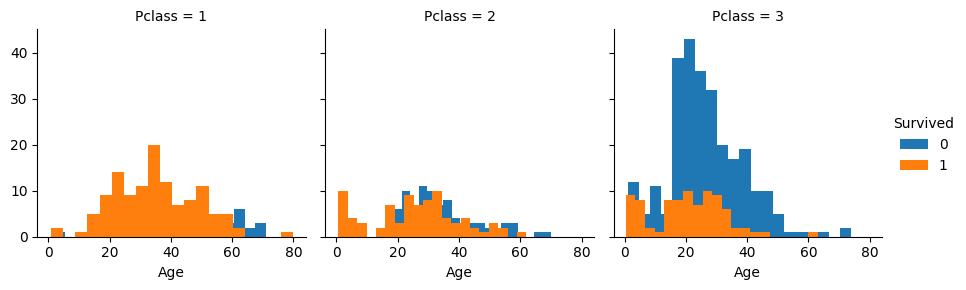

In [17]:
# Múltiples visualizaciones (facets en R)
g = sns.FacetGrid(titanic, col='Pclass', hue='Survived')
g.map(plt.hist, 'Age', bins=20)
g.add_legend()

# PARTE 1: VARIACIÓN (¿Cómo varían mis datos?)

En esta sección examinaremos la variación de las variables individuales para entender cómo se distribuyen los datos y detectar patrones interesantes.

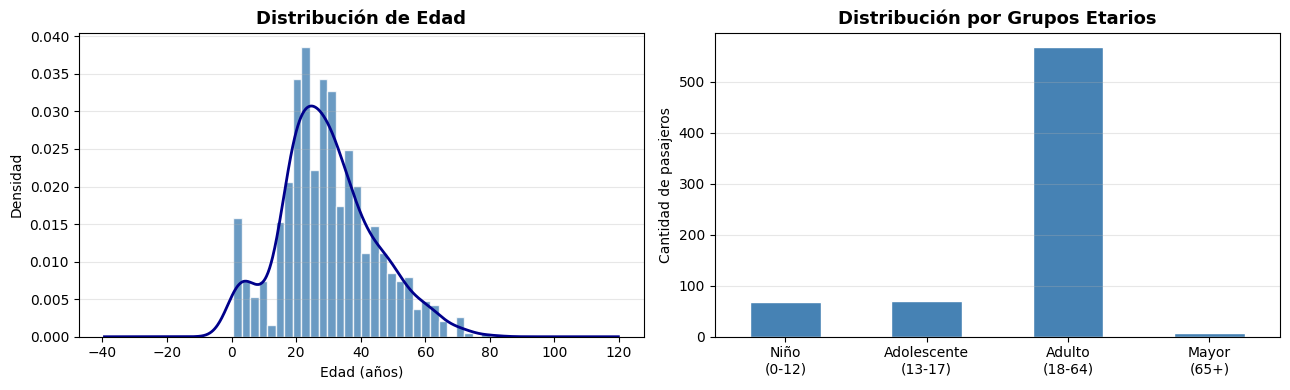

Media: 29.7 | Mediana: 28.0 | Min: 0 | Max: 80 | Datos faltantes: 177 (19.9%)


In [20]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# Histograma con KDE
ages = titanic['Age'].dropna()
axes[0].hist(ages, bins=30, color='steelblue', edgecolor='white', alpha=0.8, density=True)
ages.plot(kind='density', ax=axes[0], color='darkblue', linewidth=2)
axes[0].set_title('Distribución de Edad', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Edad (años)')
axes[0].set_ylabel('Densidad')
axes[0].grid(axis='y', alpha=0.3)

# Grupos etarios
grupos = pd.cut(titanic['Age'],
                bins=[0, 12, 18, 65, 100],
                labels=['Niño\n(0-12)', 'Adolescente\n(13-17)', 'Adulto\n(18-64)', 'Mayor\n(65+)'])
grupos.value_counts().sort_index().plot(kind='bar', ax=axes[1],
                                         color='steelblue', edgecolor='white')
axes[1].set_title('Distribución por Grupos Etarios', fontsize=13, fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('Cantidad de pasajeros')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Media: {ages.mean():.1f} | Mediana: {ages.median():.1f} | "
      f"Min: {ages.min():.0f} | Max: {ages.max():.0f} | "
      f"Datos faltantes: {titanic['Age'].isnull().sum()} ({titanic['Age'].isnull().mean()*100:.1f}%)")

**Observaciones:** La distribución es unimodal con un pico central alrededor de los 20-30 años y un segundo pico menor en edades tempranas (0-5), lo que sugiere que viajaban familias con bebés. La distribución tiene sesgo positivo leve: la media (29.7) supera a la mediana (28), arrastrada por adultos mayores.

**Outlier:** Pocos pasajeros mayores de 65 años — esperable dado que el viajar en barco entonrces era un viaje de hasta meses, poco habitual para personas de edad avanzada.

**Hipótesis:** El pico de adultos jóvenes (18-35) refleja que el Titanic transportaba principalmente emigrantes europeos hacia América, quienes típicamente eran jóvenes en busca de oportunidades. El pico infantil apunta a familias emigrando completas.

---
## Variable 2: Tarifa (`Fare`)

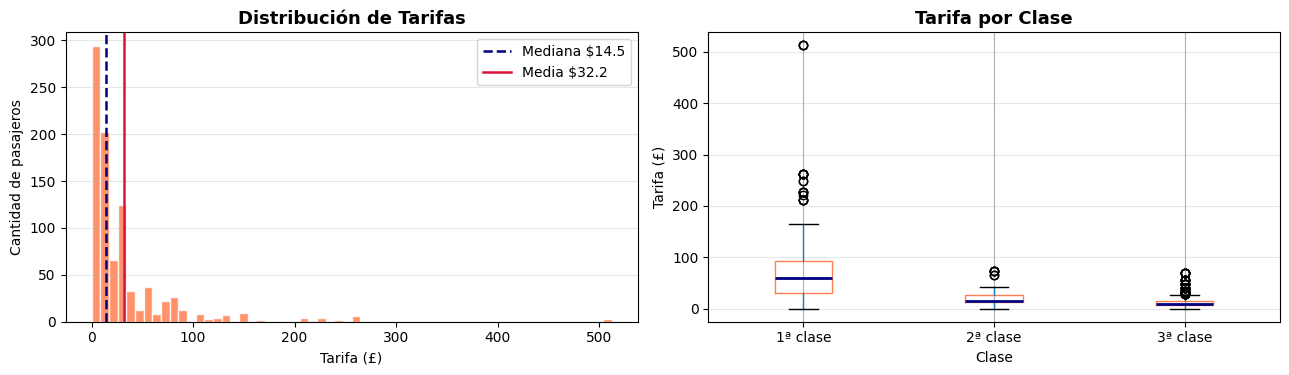

Rango intercuartílico: £7.9 – £31.0  |  Outliers (IQR): 116
Tarifa máxima: £512.3  |  Tarifa mínima: £0.0


In [21]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# Histograma con línea de mediana/media
fares = titanic['Fare'].dropna()
axes[0].hist(fares, bins=60, color='coral', edgecolor='white', alpha=0.85)
axes[0].axvline(fares.median(), color='navy', linestyle='--', linewidth=1.8, label=f'Mediana ${fares.median():.1f}')
axes[0].axvline(fares.mean(),   color='crimson', linestyle='-',  linewidth=1.8, label=f'Media ${fares.mean():.1f}')
axes[0].set_title('Distribución de Tarifas', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Tarifa (£)')
axes[0].set_ylabel('Cantidad de pasajeros')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Boxplot por clase
titanic.boxplot(column='Fare', by='Pclass', ax=axes[1], 
                boxprops=dict(color='coral'),
                medianprops=dict(color='navy', linewidth=2))
axes[1].set_title('Tarifa por Clase', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Tarifa (£)')
plt.sca(axes[1])
plt.xticks([1, 2, 3], ['1ª clase', '2ª clase', '3ª clase'])
plt.suptitle('')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Outliers via IQR
Q1, Q3 = fares.quantile([0.25, 0.75])
IQR = Q3 - Q1
n_outliers = ((fares > Q3 + 1.5*IQR) | (fares < Q1 - 1.5*IQR)).sum()
print(f"Rango intercuartílico: £{Q1:.1f} – £{Q3:.1f}  |  Outliers (IQR): {n_outliers}")
print(f"Tarifa máxima: £{fares.max():.1f}  |  Tarifa mínima: £{fares.min():.1f}")

**Observaciones:** La distribución está fuertemente sesgada a la derecha: la gran mayoría pagó menos de £50, pero hay una cola larga con valores hasta £512. La media (£32) casi duplica la mediana (£14), señal clara de outliers de alto valor. El boxplot por clase confirma que los outliers provienen casi exclusivamente de 1ª clase.

**Outliers y por qué existen:** Las tarifas más altas corresponden a cabinas de lujo (suites con salón privado), cuyos precios eran desproporcionadamente mayores. No son errores de datos sino pasajeros reales de élite.

**Hipótesis:** La distribución refleja la estratificación social de 1912. Un pasaje de 3ª clase (~£8) era accesible para emigrantes, mientras que el precio de la 1ª clase actuaba como filtro social que aseguraba exclusividad. Esto tendrá consecuencias directas en la probabilidad de supervivencia.

---
## Variable 3: Supervivencia (`Survived`)

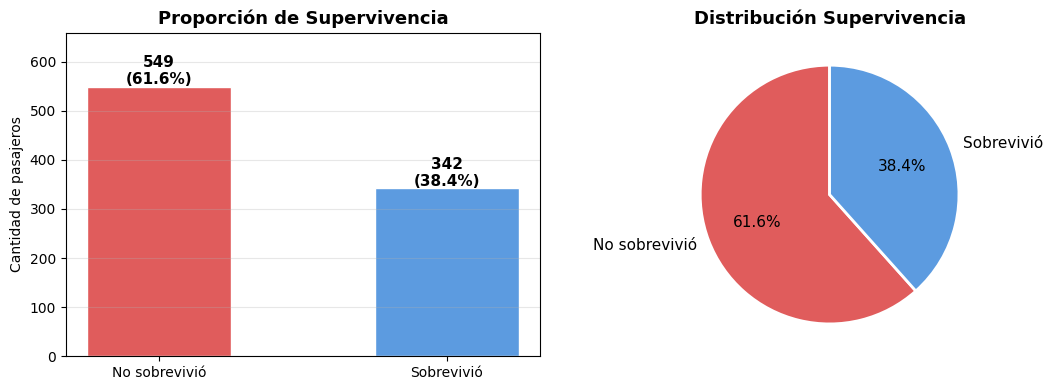

Tasa de supervivencia: 38.4%  |  Total pasajeros: 891  |  Sobrevivieron: 342  |  No sobrevivieron: 549


In [22]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# Gráfica de barras con porcentajes
counts = titanic['Survived'].value_counts().sort_index()
labels = ['No sobrevivió', 'Sobrevivió']
colors = ['#e05c5c', '#5c9be0']
bars = axes[0].bar(labels, counts, color=colors, edgecolor='white', width=0.5)
for bar, count in zip(bars, counts):
    pct = count / len(titanic) * 100
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                 f'{count}\n({pct:.1f}%)', ha='center', fontsize=11, fontweight='bold')
axes[0].set_title('Proporción de Supervivencia', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Cantidad de pasajeros')
axes[0].set_ylim(0, counts.max() * 1.2)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%',
            startangle=90, wedgeprops=dict(edgecolor='white', linewidth=2),
            textprops=dict(fontsize=11))
axes[1].set_title('Distribución Supervivencia', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

tasa = titanic['Survived'].mean()
print(f"Tasa de supervivencia: {tasa*100:.1f}%  |  "
      f"Total pasajeros: {len(titanic)}  |  "
      f"Sobrevivieron: {counts[1]}  |  No sobrevivieron: {counts[0]}")

**Observaciones:** Solo el 38.4% de los pasajeros sobrevivió frente al 61.6% que no lo hizo. La variable es binaria, por lo que no hay "outliers" en sentido estricto, pero sí hay un desbalance notable entre clases.

**¿Es lo esperado históricamente?** Sí. Registros históricos documentan ~710 sobrevivientes de 2,224 personas a bordo del barco real (~32%). En este dataset de 891 registros la cifra es del 38%, ligeramente superior porque el dataset excluye algunos registros incompletos, pero el orden de magnitud es consistente.

**Hipótesis:** Por la política de embarque de "mujeres y niños primero". La distribución desigual 62/38 probablemente esconde fuertes diferencias por sexo, clase y edad, que exploraremos en la sección de covariación.